# **Principal Component Analysis (PCA) - III**


**objectives:**

In this Jupyter Notebook we continue with **Principal Component Analysis (PCA)**.

> - [A] Importing packags and data
> - [B] Data: **Standardized** vs. **Unstandardized**
> - [C] PCA: **Covariances** vs. **Correlations**
> - [D] Explained variance by each principal component
> - [E] Dimensionality reduction using PCA
> - [F] PCA scores: **Standardized** vs. **Unstandardized**
> - [G] Loadings
> - [H] Communalities
> - [I] Visualing scores and loadings



---
## [A] Importing packages and data

We import the same packages and data as in the previous lecture:

In [2]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

from sklearn.decomposition import PCA
from sklearn import datasets

In this notebook we are working with survey data about consumer brand perception:

In [3]:
data = pd.read_csv('https://bit.ly/PMR-ch9')

In [4]:
data.head()

,perform,leader,latest,fun,serious,bargain,value,trendy,rebuy,brand
0,2,4,8,8,2,9,7,4,6,a
1,1,1,4,7,1,1,1,2,2,a
2,2,3,5,9,2,9,5,1,6,a
3,1,6,10,8,3,4,5,2,1,a
4,1,1,5,8,1,9,9,1,1,a


For example, the first observation in the second column is equal to 4. This means that this respondent has responded with a 4 to the following question:

> "On a scale from 1 to 10 - where 1 is least and 10 is most - how much of a **category leader** is brand **a**?"

We will separate the information about brands from the survey responses:

In [5]:
X = data.iloc[:, :-1]
X

,perform,leader,latest,fun,serious,bargain,value,trendy,rebuy
0,2,4,8,8,2,9,7,4,6
1,1,1,4,7,1,1,1,2,2
2,2,3,5,9,2,9,5,1,6
3,1,6,10,8,3,4,5,2,1
4,1,1,5,8,1,9,9,1,1
...,...,...,...,...,...,...,...,...,...
995,2,2,3,6,4,8,5,1,2
996,3,2,6,7,1,3,3,2,1
997,1,1,10,10,1,6,5,5,2
998,1,1,7,5,1,1,2,5,1


In [6]:
brand = data.iloc[:, -1]
brand

0      a
1      a
2      a
3      a
4      a
      ..
995    j
996    j
997    j
998    j
999    j
Name: brand, Length: 1000, dtype: object

Some descriptive statistics:

In [7]:
X.describe().round(2)

,perform,leader,latest,fun,serious,bargain,value,trendy,rebuy
count,1000.00,1000.00,1000.00,1000.00,1000.00,1000.00,1000.00,1000.00,1000.00
mean,4.49,4.42,6.20,6.07,4.32,4.26,4.34,5.22,3.73
std,3.20,2.61,3.08,2.74,2.78,2.67,2.40,2.74,2.54
min,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00
25%,1.00,2.00,4.00,4.00,2.00,2.00,2.00,3.00,1.00
50%,4.00,4.00,7.00,6.00,4.00,4.00,4.00,5.00,3.00
75%,7.00,6.00,9.00,8.00,6.00,6.00,6.00,7.00,5.00
max,10.00,10.00,10.00,10.00,10.00,10.00,10.00,10.00,10.00


Center (demean) the data:

In [8]:
X = X - X.mean()

Descriptive statistics:

In [9]:
X.describe().round(2)

,perform,leader,latest,fun,serious,bargain,value,trendy,rebuy
count,1000.00,1000.00,1000.00,1000.00,1000.00,1000.00,1000.00,1000.00,1000.00
mean,0.00,0.00,0.00,0.00,0.00,-0.00,0.00,-0.00,0.00
std,3.20,2.61,3.08,2.74,2.78,2.67,2.40,2.74,2.54
min,-3.49,-3.42,-5.20,-5.07,-3.32,-3.26,-3.34,-4.22,-2.73
25%,-3.49,-2.42,-2.20,-2.07,-2.32,-2.26,-2.34,-2.22,-2.73
50%,-0.49,-0.42,0.80,-0.07,-0.32,-0.26,-0.34,-0.22,-0.73
75%,2.51,1.58,2.80,1.93,1.68,1.74,1.66,1.78,1.27
max,5.51,5.58,3.80,3.93,5.68,5.74,5.66,4.78,6.27


Note that the standard deviations (the row corresponding to **`std`**) are not all equal to 1

---
## [B] Data: Standardized vs. Unstandardized

Just like with centered data (mean of each variable is zero) vs. uncentered data (mean of each variable is not zero), we can also distinguish between **standardized data** vs. **unstandardized data**, which is about the **variance** of each variable

> **Standardized data**: each variable has a **standard deviation of 1**

> **Unstandardized data**: **not** each variable such that it's **standard deviation of 1**

An **unstandardized** data set can be **standardized** by **rescaling** each variable (column) with its empirical standard deviation:

In [10]:
X_s = X / X.std()

Verify that `X_s` is standardized this:

In [11]:
X_s.describe().round(2)

,perform,leader,latest,fun,serious,bargain,value,trendy,rebuy
count,1000.00,1000.00,1000.00,1000.00,1000.00,1000.00,1000.00,1000.00,1000.00
mean,-0.00,-0.00,0.00,0.00,-0.00,-0.00,-0.00,0.00,0.00
std,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00
min,-1.09,-1.31,-1.69,-1.85,-1.20,-1.22,-1.39,-1.54,-1.07
25%,-1.09,-0.93,-0.71,-0.75,-0.84,-0.85,-0.97,-0.81,-1.07
50%,-0.15,-0.16,0.26,-0.02,-0.12,-0.10,-0.14,-0.08,-0.29
75%,0.78,0.61,0.91,0.70,0.60,0.65,0.69,0.65,0.50
max,1.72,2.14,1.24,1.43,2.04,2.15,2.36,1.74,2.47


Note that by standardizing the data, the **covariances are now equal to the correlations**:

In [12]:
X_s.cov().round(2)

,perform,leader,latest,fun,serious,bargain,value,trendy,rebuy
perform,1.00,0.50,-0.12,-0.26,0.36,0.06,0.10,0.01,0.31
leader,0.50,1.00,0.03,-0.29,0.57,0.03,0.12,0.07,0.21
latest,-0.12,0.03,1.00,0.25,0.01,-0.25,-0.34,0.63,-0.40
fun,-0.26,-0.29,0.25,1.00,-0.28,-0.07,-0.15,0.13,-0.24
serious,0.36,0.57,0.01,-0.28,1.00,-0.00,0.02,0.12,0.18
bargain,0.06,0.03,-0.25,-0.07,-0.00,1.00,0.74,-0.35,0.47
value,0.10,0.12,-0.34,-0.15,0.02,0.74,1.00,-0.43,0.51
trendy,0.01,0.07,0.63,0.13,0.12,-0.35,-0.43,1.00,-0.30
rebuy,0.31,0.21,-0.40,-0.24,0.18,0.47,0.51,-0.30,1.00


In [13]:
X_s.corr().round(2)

,perform,leader,latest,fun,serious,bargain,value,trendy,rebuy
perform,1.00,0.50,-0.12,-0.26,0.36,0.06,0.10,0.01,0.31
leader,0.50,1.00,0.03,-0.29,0.57,0.03,0.12,0.07,0.21
latest,-0.12,0.03,1.00,0.25,0.01,-0.25,-0.34,0.63,-0.40
fun,-0.26,-0.29,0.25,1.00,-0.28,-0.07,-0.15,0.13,-0.24
serious,0.36,0.57,0.01,-0.28,1.00,-0.00,0.02,0.12,0.18
bargain,0.06,0.03,-0.25,-0.07,-0.00,1.00,0.74,-0.35,0.47
value,0.10,0.12,-0.34,-0.15,0.02,0.74,1.00,-0.43,0.51
trendy,0.01,0.07,0.63,0.13,0.12,-0.35,-0.43,1.00,-0.30
rebuy,0.31,0.21,-0.40,-0.24,0.18,0.47,0.51,-0.30,1.00


In [14]:
assert np.allclose(X_s.cov(), X_s.corr())

---
## [C] PCA: Covariances vs. Correlations

PCA can be applied both to both **covariances** (**unstandardized** data) and **correlations** (**standardized** data).

You as a researcher need to make a decision:

> **PCA based on covariances** (unstandardized data):
> - Use the variables in the dataset as-is, with different variances
> - The PCA solution will "focus" on variables with a large variance in the data, and place less emphasis on variables with a low variance
> - This behavior is acceptable if the variables are measured on the same scale and if differences in variance are meaningful
> - Typically easier to explain a lot of the variation in the data using just a few principal components

> **PCA based on correlations** (standardized data):
> - Each variable in the dataset is standardized such that it has variance 1
> - An even playing field in which each variable "contributes the same" to the PCA solution
> - Applying PCA based on correlations is a good idea if the scale of variables is not comparable
> - Typically more difficult to explain a lot of the variation in the data using just a few principal components

Finding the PCA solution based on covariances and correlations:

In [15]:
pca_cov = PCA().fit(X)
pca_cov_directions = pd.DataFrame(
    pca_cov.components_.T,
    index=X.columns,
    columns=['PC' + str(l + 1) for l in range(pca_cov.n_components_)],
)
pca_cov_scores = pd.DataFrame(
    pca_cov.transform(X), # Should be the same as for the fit method!
    columns=['PC' + str(l + 1) for l in range(pca_cov.n_components_)],
)

In [16]:
pca_corr = PCA().fit(X_s)
pca_corr_directions = pd.DataFrame(
    pca_corr.components_.T,
    index=X.columns,
    columns=['PC' + str(l + 1) for l in range(pca_cov.n_components_)],
)
pca_corr_scores = pd.DataFrame(
    pca_corr.transform(X_s), # Should be the same as for the fit method!
    columns=['PC' + str(l + 1) for l in range(pca_cov.n_components_)],
)

The principal component directions are different:

In [17]:
pca_cov_directions.round(2)

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9
perform,0.35,0.49,-0.05,-0.69,-0.26,-0.12,-0.25,-0.12,0.03
leader,0.23,0.44,0.08,0.10,0.26,-0.36,0.59,0.42,-0.15
latest,-0.44,0.31,0.53,0.11,-0.22,-0.25,0.18,-0.53,0.02
fun,-0.28,-0.18,0.35,-0.58,0.64,0.10,0.04,0.06,0.03
serious,0.20,0.46,0.03,0.38,0.56,0.20,-0.42,-0.26,0.07
bargain,0.34,-0.23,0.57,0.10,-0.09,-0.12,-0.33,0.14,-0.59
value,0.35,-0.19,0.40,0.10,-0.05,-0.18,-0.05,0.14,0.79
trendy,-0.34,0.37,0.25,0.05,-0.26,0.48,-0.17,0.59,0.09
rebuy,0.39,-0.03,0.20,-0.05,-0.09,0.68,0.50,-0.28,-0.05


In [18]:
pca_corr_directions.round(2)

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9
perform,0.24,0.42,-0.04,-0.53,0.47,-0.34,-0.36,-0.14,0.05
leader,0.21,0.52,0.10,-0.09,-0.29,-0.30,0.61,0.29,-0.18
latest,-0.37,0.20,0.53,0.21,0.11,-0.17,0.19,-0.64,0.06
fun,-0.25,-0.25,0.42,-0.75,-0.33,0.14,0.01,0.07,0.03
serious,0.16,0.51,0.04,0.10,-0.56,0.39,-0.45,-0.18,0.09
bargain,0.40,-0.22,0.49,0.17,-0.01,-0.14,-0.29,0.06,-0.65
value,0.45,-0.19,0.37,0.15,-0.06,-0.22,-0.02,0.15,0.73
trendy,-0.35,0.32,0.37,0.17,0.37,0.27,-0.15,0.61,0.06
rebuy,0.44,0.02,0.12,-0.13,0.36,0.68,0.39,-0.20,-0.02


---
## [D] Explained variance by each principal component

The idea behind PCA is that we find new variables (principal components) that are sorted (in descending order) by the amount of variance they explain in the original data. **How much variation is explained by each principal component can be quantified**.

### The `explained_variance_` attribute

The `explained_variance_` attribute of the PCA object gives the **eigenvalues** for each principal component:

In [19]:
pca_cov_eigenvalues = pca_cov.explained_variance_
pca_cov_eigenvalues

array([22.06848135, 16.56003219,  8.16507901,  6.22323697,  5.01857416,
        3.74582008,  2.84621704,  2.49127269,  1.53134657])

Each eigenvalue describes **how much variation** is explained by each principal component.

- Remember, the principal components are constructed such that the first principal component explains the most variance, the second principal component the second most variance, and so and so forth
- This also shows from the eigenvalues, as those are sorted in descending order

Let's look at the **first eigenvalue**, which corresponds to the **first principal component**

In [20]:
pca_cov_eigenvalues[0]

22.06848134695485

Compare this against the variance of the first principal component score:

In [21]:
pca_cov_scores.loc[:, 'PC1'].var()

22.068481346954844

Indeed, the first eigenvalue is **identical** to the variance of the first principal component score.

Similarly, for all eigenvalues and all principal component scores:

In [22]:
pca_cov_eigenvalues

array([22.06848135, 16.56003219,  8.16507901,  6.22323697,  5.01857416,
        3.74582008,  2.84621704,  2.49127269,  1.53134657])

In [23]:
pca_cov_scores.var()

PC1    22.068481
PC2    16.560032
PC3     8.165079
PC4     6.223237
PC5     5.018574
PC6     3.745820
PC7     2.846217
PC8     2.491273
PC9     1.531347
dtype: float64

In fact, the sum of the eigenvalues is equal to the sum of the variance in the data set:

In [24]:
np.sum(pca_cov_eigenvalues)

68.6500600600601

and:

In [25]:
np.sum(X.var())

68.65006006006017

and naturally also identical to the sum of the variance in the principal component scores:

In [26]:
np.sum(pca_cov_scores.var())

68.65006006006006

### The `explained_variance_ratio_` attribute

The `explained_variance_ratio_` attribute gives the ratio of total variance explained by each principal component:

In [27]:
pca_cov.explained_variance_ratio_

array([0.32146339, 0.24122386, 0.11893768, 0.09065159, 0.07310371,
       0.05456397, 0.04145979, 0.03628945, 0.02230656])

Each of these numbers tell us the ratio of the **total variation** in the data that is explained by each principal component.

In this case:
- PC1 accounts for approximately 32.15% of all the variation in the data
- PC2 accounts for another 24.12%

This is what we typically see in PCA solutions. We only need a small number of principal components to summarize a lot of the variation the data, even if the data consists of many (hundreds) of variables.

Note that the `explained_variance_ratio_` adds up to 1:

In [28]:
np.sum(pca_cov.explained_variance_ratio_)

1.0

Note that the `explained_variance_ratio_` attribute is just here for convenience, each element is equal to the corresponding eigenvalue divided by its sum:

In [29]:
pca_cov_eigenvalues / np.sum(pca_cov_eigenvalues)

array([0.32146339, 0.24122386, 0.11893768, 0.09065159, 0.07310371,
       0.05456397, 0.04145979, 0.03628945, 0.02230656])

---
## [E] Dimensionality reduction using PCA

The **number of principal components that we retain** is given by the number $L$.

> Setting $L < P$ will lead to **dimensionality reduction**.

The **eigenvalues** can directly be used for some (heuristic) tests to determine the number of principal components we would like to retain in our analysis. The intuition here is that we only want to **keep those principal components that explain a lot of variation** in the data.

We will discuss 3 heuristic tests to determine $L$:
- Kaiser's rule
- Scree plot
- Proportion of variance explained



### Kaiser's rule

**Kaiser's rule**: Only keep the principal components that have an eigenvalue larger than 1.
- Only works well on data that has been standardized

> Intuition: We only keep principal components that explain the variance of **at least one variable**.



In [30]:
pca_cov_eigenvalues

array([22.06848135, 16.56003219,  8.16507901,  6.22323697,  5.01857416,
        3.74582008,  2.84621704,  2.49127269,  1.53134657])

In this case, using Kaiser's rule we would keep **all** principal components.

Contrast this against using Kaiser's rule for the PCA solution on the **standardized** data:

In [31]:
pca_corr_eigenvalues = pca_corr.explained_variance_
pca_corr_eigenvalues

array([2.97929556, 2.09655168, 1.07925487, 0.72721099, 0.63754592,
       0.53484323, 0.39010444, 0.31204642, 0.24314689])

In this case, we would only keep the first three principal components.

### Scree plot

**Scree plot**: Create a **line plot** of the eigenvalues and only retain the principal components **before** the eigenvalues start to level off
> Often, the scree plot has the shape of an **elbow**, sometimes the scree plot is also referred to as the "elbow plot"

> The scree test then corresponds to finding the principal component index that corresponds to the "bend of the elbow". This is the point where the eigenvalues start to level off.

> The scree test then says that we should select all the principal components **before** the bend of the elbow.

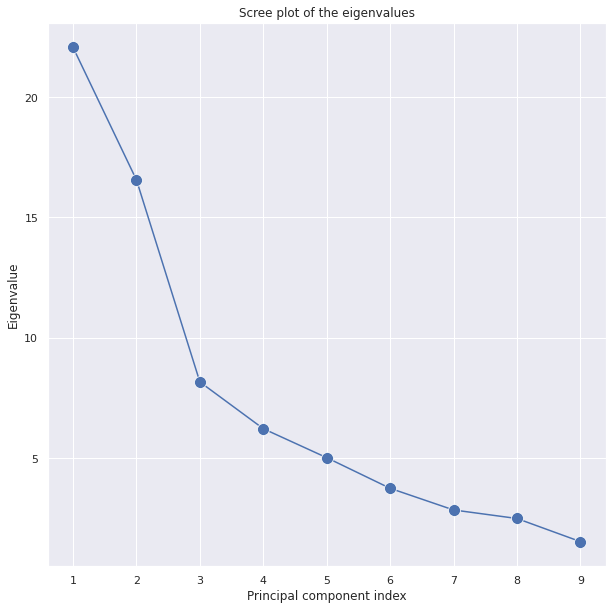

In [32]:
plt.figure(figsize=(10, 10))

plt.title('Scree plot of the eigenvalues')
plt.xlabel('Principal component index')
plt.ylabel('Eigenvalue')

sns.lineplot(
    x=np.arange(len(pca_cov_eigenvalues)) + 1,
    y=pca_cov_eigenvalues,
    marker='o',
    markersize=12,
)
plt.xticks(np.arange(len(pca_cov_eigenvalues)) + 1)
plt.show()

In the scree plot above, the "bending point of the elbow" can be clearly defined as occuring **at** the third principal component:

> This implies that starting from the third principal components, the eigenvalues level off, and each principal component more or less explains the same amount of variance

In this case, using the scree plot, we would only keep the first two principal component.

**Gotcha #1**: You should be aware that the scree plot does not always represent an elbow! In particular this is the case if PCA is not able to summarize information in just a few components

**Gotcha #2**: In this case the Kaiser rule and the scree plot resulted in the same number of selected components. In general, this does not have to be the case!

We can create a scree plot for the PCA solution based on correlations:

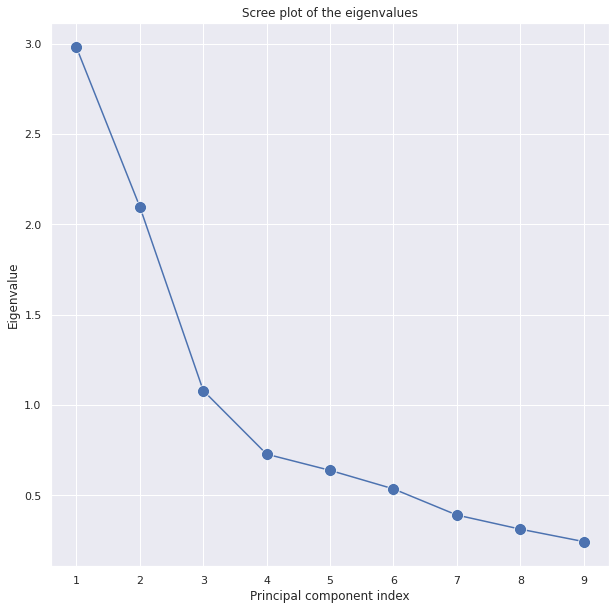

In [33]:
plt.figure(figsize=(10, 10))

plt.title('Scree plot of the eigenvalues')
plt.xlabel('Principal component index')
plt.ylabel('Eigenvalue')

sns.lineplot(
    x=np.arange(len(pca_corr_eigenvalues)) + 1,
    y=pca_corr_eigenvalues,
    marker='o',
    markersize=12,
)
plt.xticks(np.arange(len(pca_corr_eigenvalues)) + 1)
plt.show()

Here, the elbow bends at the third principal component, so only the first two principal components are selected.

### Proportion of variance explained

Here you, as a researcher, decide on the amount of variance the PCA solution should explain. Typical values are 90% or 95%
> Note that **Occam's razor** applies here: simpler models that are (almost) equivalent tend to work better

> It is most convenient to directly work with **`explained_variance_ratio_`** and calculate the **cumulative sum** using the `cumsum` function in numpy:

In [34]:
np.cumsum(pca_cov.explained_variance_ratio_)

array([0.32146339, 0.56268725, 0.68162493, 0.77227652, 0.84538023,
       0.89994421, 0.941404  , 0.97769344, 1.        ])

**Questions**
> 1. How many component should I retain if I want to explain at least 90% of the variance?
> 2. How many component should I retain if I want to explain at least 95% of the variance?
> 3. How many component should I retain if I want to explain at least 99% of the variance?

**Answers**
> 1. The first 7 components
> 2. The first 8 components
> 3. All components

We can answer the same questions for the PCA solution based on the correlations in the data:

In [35]:
np.cumsum(pca_corr.explained_variance_ratio_)

array([0.33103284, 0.56398303, 0.68390023, 0.76470146, 0.83553989,
       0.89496692, 0.93831185, 0.97298368, 1.        ])

**Answers**
> 1. The first 7 components
> 2. The first 8 components
> 3. All components

In this case the answers are the same.

---
## [F] PCA scores: Standardized vs. Unstandardized

> **Note**: This discussion is **unrelated** to the decision of standardizing your dataset. It applies to both PCA based on covariances (**unstandardized data**) and PCA based on correlations (**standardized data**)

So far we have worked with **PCA scores** and **PCA directions**:
- The directions do not contain any scale of the data (in technical terms, the vectors have a length of one)
- The scores capture the scale of the data
 - The first principal component has the largest variance
 - The second principal component the second largest variance
 - And so on and so forth...
- These scores are called **unstandardized**

Remember, we can retrieve our original dataset by matrix multiplying the scores with the transpose of the direction matrix:


In [36]:
assert np.allclose(X, pca_cov_scores @ pca_cov_directions.T)

### **Standardized scores**

However, there is **another** way to represent the PCA solution, by working with **standardized** scores.

We can standardize the scores in the same way we standardized our data, by dividing the unstandardized PCA scores by their empirical **standard deviation**.

Remember that the **variance** of the unstandardized PCA scores is given by the **eigenvalues**. The **standard deviation** is then given by the **square root of the eigenvalues**:

In [37]:
np.sqrt(pca_cov_eigenvalues)

array([4.69771022, 4.06940194, 2.85746024, 2.49464165, 2.24021744,
       1.93541212, 1.68707351, 1.5783766 , 1.23747589])

Verify that this is equal to the empirical standard deviation of the **PCA scores**:

In [38]:
pca_cov_scores.std()

PC1    4.697710
PC2    4.069402
PC3    2.857460
PC4    2.494642
PC5    2.240217
PC6    1.935412
PC7    1.687074
PC8    1.578377
PC9    1.237476
dtype: float64

So we compute our **standardized** PCA scores by **dividing** each score with the square root of its corresponding eigenvalue:

In [39]:
# Elementwise: Divide each column by the sqrt of its corresponding eigenvalue
pca_cov_scores_standardized = pca_cov_scores / np.sqrt(pca_cov_eigenvalues)

Verify that the scores are now standardized:

In [40]:
pca_cov_scores_standardized.describe().round(2)

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9
count,1000.00,1000.00,1000.00,1000.00,1000.00,1000.00,1000.00,1000.00,1000.00
mean,-0.00,-0.00,-0.00,0.00,0.00,-0.00,0.00,-0.00,-0.00
std,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00
min,-2.16,-2.37,-2.76,-2.85,-3.11,-3.21,-3.46,-2.88,-3.19
25%,-0.75,-0.68,-0.67,-0.63,-0.64,-0.69,-0.67,-0.68,-0.64
50%,-0.12,-0.12,-0.03,0.04,-0.05,-0.03,-0.05,-0.01,0.02
75%,0.71,0.68,0.67,0.66,0.63,0.65,0.66,0.63,0.65
max,2.80,2.61,2.83,2.90,3.42,3.35,3.80,3.63,3.61


Why would we want to use the **standardized** scores over the **unstandardized** scores?
- Typically, you will use the PCA output (that is, scores) as input to some other method
- Many machine learning methods benefit from **standardized input**
- For example, it will facilitate interpretation, or improve the statistical performance of these methods

Therefore:
> It is more common to work with **standardized** PCA scores instead of **unstandardized** PCA scores

## [G] Loadings

The **standardized PCA scores** no longer contain the **scale** information of the data.
- We have to **scale** the PCA directions such that these directions now contain the scale information
- These **scaled directions** are called **loadings**

We compute **loadings** by **multiplying** each direction with the square root of its corresponding eigenvalue
- This is the inverse operation of what we performed on the unstandardized PCA scores

In [41]:
# Elementwise: Multiply each column by the sqrt of its corresponding eigenvalue
pca_cov_loadings = pca_cov_directions * np.sqrt(pca_cov_eigenvalues)
pca_cov_loadings.round(2)

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9
perform,1.66,1.97,-0.13,-1.73,-0.58,-0.23,-0.42,-0.19,0.04
leader,1.08,1.80,0.23,0.25,0.59,-0.69,0.99,0.66,-0.18
latest,-2.08,1.25,1.50,0.27,-0.50,-0.49,0.30,-0.83,0.03
fun,-1.33,-0.75,1.01,-1.44,1.44,0.19,0.06,0.09,0.03
serious,0.95,1.88,0.07,0.95,1.25,0.39,-0.71,-0.42,0.08
bargain,1.59,-0.94,1.64,0.24,-0.21,-0.24,-0.56,0.22,-0.73
value,1.63,-0.78,1.14,0.24,-0.12,-0.34,-0.08,0.22,0.97
trendy,-1.60,1.50,0.72,0.12,-0.59,0.94,-0.29,0.92,0.11
rebuy,1.85,-0.13,0.57,-0.12,-0.21,1.32,0.84,-0.45,-0.06


Now the **standardized scores** and the **loadings** can be used to obtain the original data:

In [42]:
assert np.allclose(X, pca_cov_scores_standardized @ pca_cov_loadings.T)

This loadings matrix has a few convenient properties that makes it easier to interpret than the directions matrix.

### Loadings interpretation for PCA based on **covariances**

If working with PCA based on **covariances**, that is, on **unstandardized** data, the loadings matrix corresponds to the **covariances** between the original $P$ **unstandardized** variables in the dataset and the $L$ **standardized** PCA scores:

In [43]:
# This function computes the covariance between X and Z
def compute_cov_X_Z(df_X, df_Z):
    K_X = df_X.shape[1]
    K_Z = df_Z.shape[1]
    cov_X_Z = pd.concat([X, df_Z], axis=1).cov().iloc[:K_X, K_Z:]
    return pd.DataFrame(
        cov_X_Z.values,
        index=df_X.columns,
        columns=df_Z.columns,
    )

In [44]:
compute_cov_X_Z(X, pca_cov_scores_standardized).round(2)

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9
perform,1.66,1.97,-0.13,-1.73,-0.58,-0.23,-0.42,-0.19,0.04
leader,1.08,1.80,0.23,0.25,0.59,-0.69,0.99,0.66,-0.18
latest,-2.08,1.25,1.50,0.27,-0.50,-0.49,0.30,-0.83,0.03
fun,-1.33,-0.75,1.01,-1.44,1.44,0.19,0.06,0.09,0.03
serious,0.95,1.88,0.07,0.95,1.25,0.39,-0.71,-0.42,0.08
bargain,1.59,-0.94,1.64,0.24,-0.21,-0.24,-0.56,0.22,-0.73
value,1.63,-0.78,1.14,0.24,-0.12,-0.34,-0.08,0.22,0.97
trendy,-1.60,1.50,0.72,0.12,-0.59,0.94,-0.29,0.92,0.11
rebuy,1.85,-0.13,0.57,-0.12,-0.21,1.32,0.84,-0.45,-0.06


We can assert that this is equal to the corresponding loadings matrix:

In [45]:
assert np.allclose(pca_cov_loadings, compute_cov_X_Z(X, pca_cov_scores_standardized))

### Loadings interpretation for PCA based on **correlations**

If working with PCA based on **correlations**, that is, on **standardized** data, the loadings matrix corresponds to the **correlations** between the original $P$ **standardized** variables in the dataset and the $L$ **standardized** PCA scores.

First, we compute the **standardized scores** and **loadings** for the PCA solution based on correlations:

In [46]:
pca_corr_scores_standardized = pca_corr_scores / np.sqrt(pca_corr_eigenvalues)
pca_corr_loadings = pca_corr_directions * np.sqrt(pca_corr_eigenvalues)

Next, we compute the correlation matrix:

In [47]:
# This function computes the correlation between X and Z
def compute_corr_X_Z(df_X, df_Z):
    K_X = df_X.shape[1]
    K_Z = df_Z.shape[1]
    corr_X_Z = pd.concat([X, df_Z], axis=1).corr().iloc[:K_X, K_Z:]
    return pd.DataFrame(
        corr_X_Z.values,
        index=df_X.columns,
        columns=df_Z.columns,
    )

In [48]:
compute_corr_X_Z(X_s, pca_corr_scores_standardized).round(2)

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9
perform,0.41,0.61,-0.04,-0.45,0.37,-0.25,-0.23,-0.08,0.03
leader,0.36,0.76,0.10,-0.08,-0.24,-0.22,0.38,0.16,-0.09
latest,-0.64,0.29,0.55,0.18,0.08,-0.13,0.12,-0.36,0.03
fun,-0.43,-0.36,0.43,-0.64,-0.26,0.10,0.00,0.04,0.02
serious,0.28,0.74,0.04,0.08,-0.44,0.29,-0.28,-0.10,0.04
bargain,0.69,-0.32,0.51,0.14,-0.01,-0.10,-0.18,0.03,-0.32
value,0.77,-0.27,0.38,0.13,-0.05,-0.16,-0.01,0.08,0.36
trendy,-0.61,0.46,0.39,0.14,0.29,0.19,-0.10,0.34,0.03
rebuy,0.76,0.02,0.13,-0.11,0.28,0.49,0.24,-0.11,-0.01


The correspoding loading matrix:

In [49]:
pca_corr_loadings.round(2)

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9
perform,0.41,0.61,-0.04,-0.45,0.37,-0.25,-0.23,-0.08,0.03
leader,0.36,0.76,0.10,-0.08,-0.24,-0.22,0.38,0.16,-0.09
latest,-0.64,0.29,0.55,0.18,0.08,-0.13,0.12,-0.36,0.03
fun,-0.43,-0.36,0.43,-0.64,-0.26,0.10,0.00,0.04,0.02
serious,0.28,0.74,0.04,0.08,-0.44,0.29,-0.28,-0.10,0.04
bargain,0.69,-0.32,0.51,0.14,-0.01,-0.10,-0.18,0.03,-0.32
value,0.77,-0.27,0.38,0.13,-0.05,-0.16,-0.01,0.08,0.36
trendy,-0.61,0.46,0.39,0.14,0.29,0.19,-0.10,0.34,0.03
rebuy,0.76,0.02,0.13,-0.11,0.28,0.49,0.24,-0.11,-0.01


In [50]:
assert np.allclose(pca_corr_loadings, compute_corr_X_Z(X_s, pca_corr_scores_standardized))

---
## [H] Communalities

The loadings matrix can be transformed to **communalities** as follows:
1. Take the **square** of each element in the loadings matrix
2. Per row, take the **cumulative sum** of these **squared** elements
 - For this we should use the **`cumsum`** function from numpy

In [51]:
pca_cov_communalities = np.cumsum(pca_cov_loadings**2, 1)
pca_cov_communalities.round(2)

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9
perform,2.76,6.66,6.68,9.66,10.00,10.05,10.23,10.26,10.26
leader,1.17,4.43,4.48,4.54,4.89,5.36,6.34,6.77,6.80
latest,4.31,5.88,8.14,8.21,8.46,8.69,8.78,9.47,9.47
fun,1.76,2.32,3.33,5.40,7.48,7.52,7.52,7.53,7.53
serious,0.89,4.42,4.43,5.32,6.89,7.04,7.54,7.71,7.72
bargain,2.52,3.39,6.07,6.13,6.17,6.23,6.54,6.59,7.11
value,2.65,3.26,4.56,4.62,4.63,4.75,4.76,4.81,5.75
trendy,2.57,4.82,5.33,5.35,5.69,6.57,6.65,7.51,7.52
rebuy,3.44,3.45,3.78,3.79,3.83,5.57,6.27,6.47,6.47


To interpret the communality, let's take the values for (perform, PC1) and (perform, PC2).

- (perform, PC1): Describes how much of the **variance** of the **perform** variable is explained by the **first** principal component. In this case 2.76 (out of 10.26)

- (perform, PC2): Describes how much of the **variance** of the **perform** variable is explained by the **first two** principal components. In this case 6.66 (out of 10.26)

Note that the last column of the communality matrix is equal to the variance of the data:


In [52]:
X.var()

perform    10.262118
leader      6.803915
latest      9.474449
fun         7.530907
serious     7.718389
bargain     7.113032
value       5.753184
trendy      7.519119
rebuy       6.474946
dtype: float64

The same interpretation holds for PCA based on correlations:

In [53]:
pca_corr_communalities = np.cumsum(pca_corr_loadings**2, 1)
pca_corr_communalities.round(2)

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9
perform,0.17,0.54,0.54,0.74,0.88,0.94,0.99,1.00,1.0
leader,0.13,0.70,0.71,0.72,0.77,0.82,0.97,0.99,1.0
latest,0.41,0.49,0.80,0.83,0.84,0.86,0.87,1.00,1.0
fun,0.19,0.32,0.51,0.92,0.99,1.00,1.00,1.00,1.0
serious,0.08,0.62,0.62,0.63,0.83,0.91,0.99,1.00,1.0
bargain,0.47,0.57,0.83,0.85,0.85,0.86,0.90,0.90,1.0
value,0.60,0.67,0.82,0.84,0.84,0.86,0.86,0.87,1.0
trendy,0.37,0.58,0.73,0.75,0.83,0.87,0.88,1.00,1.0
rebuy,0.57,0.57,0.59,0.60,0.68,0.93,0.99,1.00,1.0


However, the interpretation is now slightly more convenient:

- (perform, PC1): Describes the **percentage of the variance** of the **perform** (standardized) variable that is explained by the **first** principal component. In this case 17%

- (perform, PC2): Describes the **percentage of the variance** of the **perform** (standardized) variable that is explained by the **first two** principal components. In this case 54%

Note that this is still the amount of **variance** explained, as after standardizing the data each variable has a variance of 1

---
## [I] Visualizing scores and loadings

### Loadings plot

The $P$ original variables can be visualized in two dimensions of the PCA solution by plotting the **loadings of each variable** in these two dimensions.
- Typically the first two dimensions are chosen (as these explain the most variance in the data)
- However, you are free to explore other combinations of the PCA solution as well

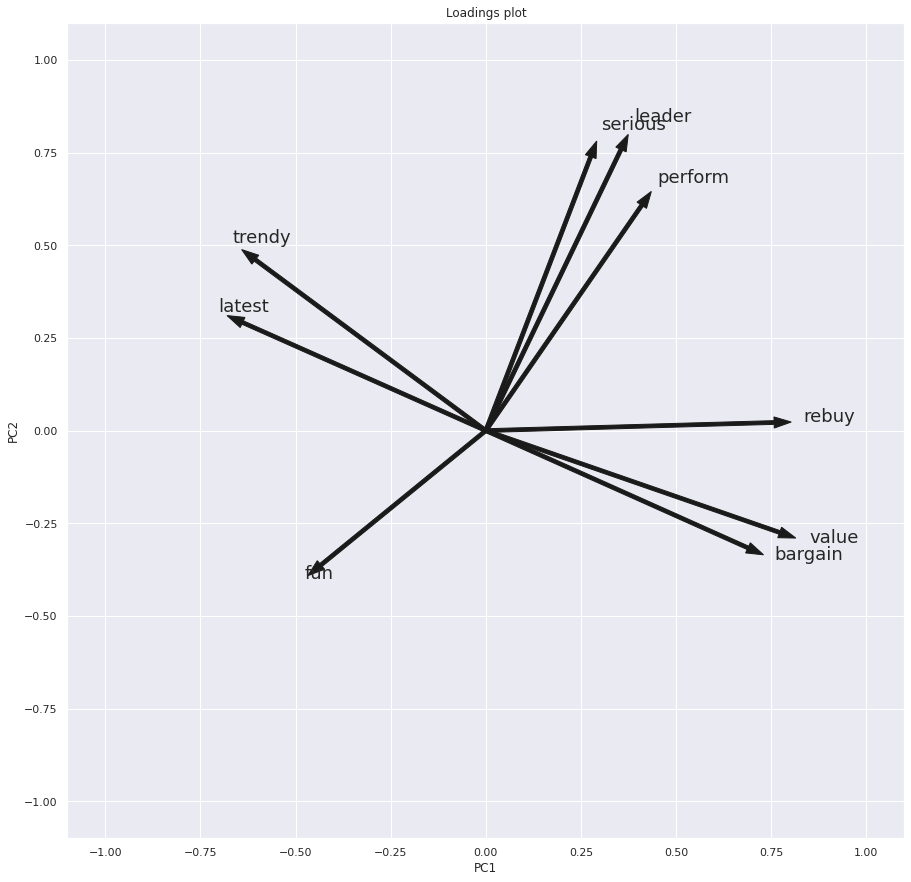

In [54]:
fig = plt.figure(figsize=[15, 15])

plt.title('Loadings plot')
plt.xlabel('PC1')
plt.ylabel('PC2')

xlim_val = np.max((1.1, np.max(np.abs(pca_corr_loadings.loc[:, 'PC1']))))
plt.xlim([-xlim_val, xlim_val])

ylim_val = np.max((1.1, np.max(np.abs(pca_corr_loadings.loc[:, 'PC2']))))
plt.ylim([-ylim_val, ylim_val])

for variable in pca_corr_loadings.index.values:
    plt.arrow(
        x=0,
        y=0,
        dx=pca_corr_loadings.loc[variable]['PC1'],
        dy=pca_corr_loadings.loc[variable]['PC2'],
        width=0.01,
        color='k'
    )

    plt.text(
        x=1.1*pca_corr_loadings.loc[variable]['PC1'],
        y=1.1*pca_corr_loadings.loc[variable]['PC2'],
        s=variable,
        fontsize=18,
    )

plt.show()

For a pair of variables, consider the angle of their two arrows in the loadings plot:
- If the angle between the arrows is small: **Strong positive** correlation
 - For example, serious and leader
- If the angle between the arrows is almost 180 degrees: **Strong negative** correlation beween the variables
 - For example, latest and bargain
- If the angle between the arrows is close to 90 degrees: **Approximately no relationship** between the varaibles
 - For example, leader and bargain

### Score plot

The $N$ observations can be visualized in two dimensions of the PCA solution by plotting the **standardized PCA scores** of each variable in these two dimensions.
- Typically the first two dimensions are chosen (as these explain the most variance in the data)
- However, you are free to explore other combinations of the PCA solution as well

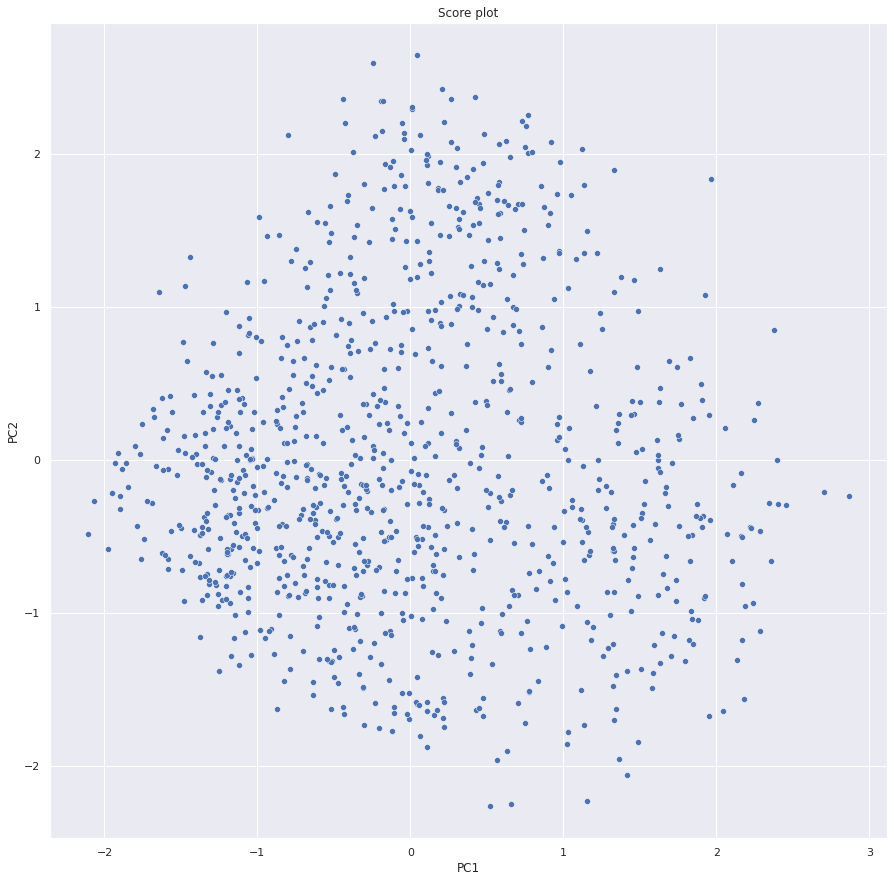

In [55]:
fig = plt.figure(figsize=[15, 15])

plt.title('Score plot')
plt.xlabel('PC1')
plt.ylabel('PC2')

g = sns.scatterplot(
    x=pca_corr_scores_standardized.iloc[:, 0],
    y=pca_corr_scores_standardized.iloc[:, 1],
)

g.axis('equal')

plt.show()

By itself, the score plot is not always informative (which is the case here)
- If additional information is available, this can be used to increase the usefulness of a score plot
- In our case, we know for each observation which brand was rated


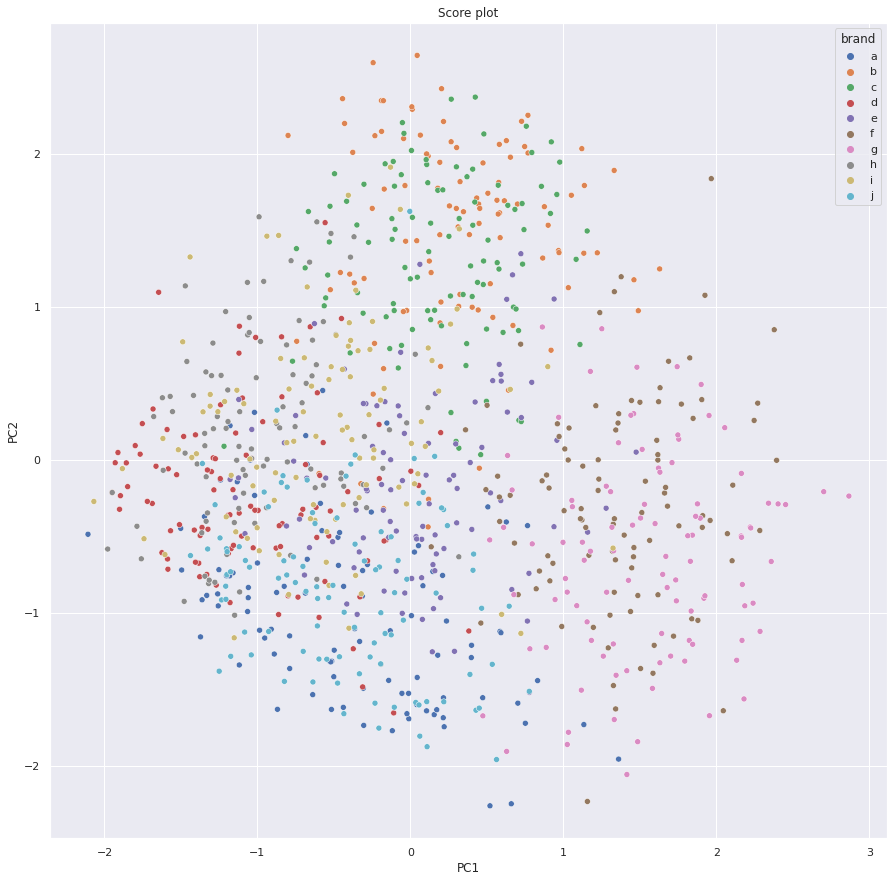

In [56]:
fig = plt.figure(figsize=[15, 15])

plt.title('Score plot')
plt.xlabel('PC1')
plt.ylabel('PC2')

g = sns.scatterplot(
    x=pca_corr_scores_standardized.iloc[:, 0],
    y=pca_corr_scores_standardized.iloc[:, 1],
    hue=brand,
)

g.axis('equal')

plt.show()

By examining the score plot, we can identify areas in the axes spanned by two principal components where some brands are "located"

### Biplot

A biplot combines the information of the loadings plot and score plot:

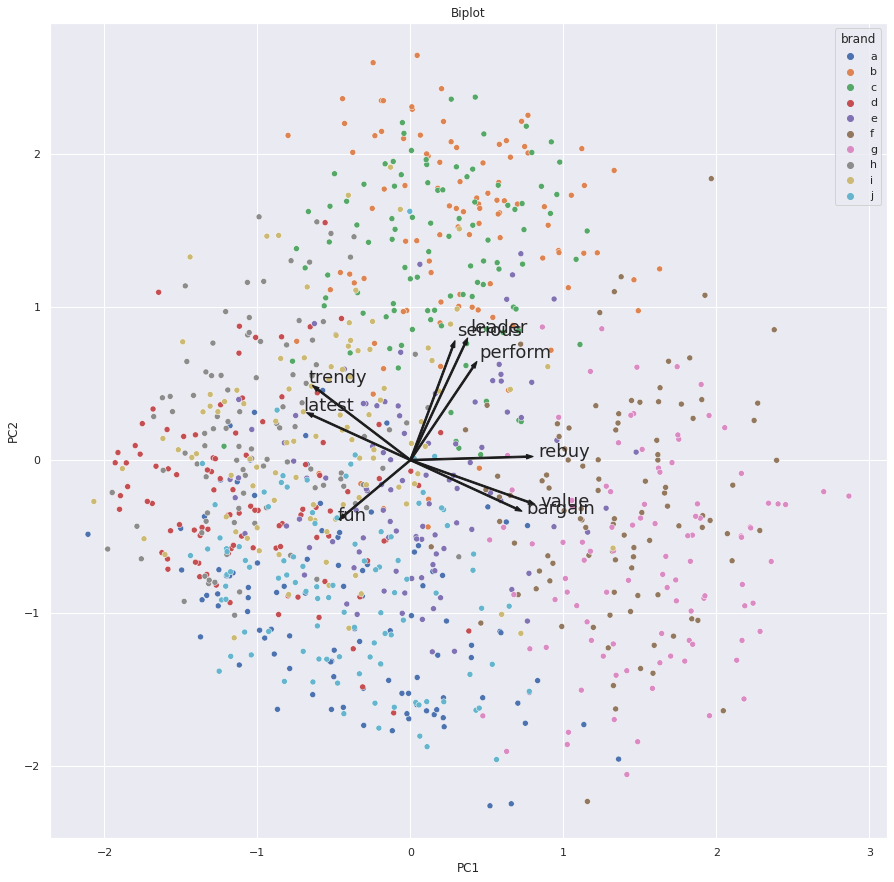

In [57]:
fig = plt.figure(figsize=[15, 15])

plt.title('Biplot')
plt.xlabel('PC1')
plt.ylabel('PC2')

xlim_val = np.max((1.1, np.max(np.abs(pca_corr_loadings.loc[:, 'PC1']))))
plt.xlim([-xlim_val, xlim_val])

ylim_val = np.max((1.1, np.max(np.abs(pca_corr_loadings.loc[:, 'PC2']))))
plt.ylim([-ylim_val, ylim_val])

for variable in pca_corr_loadings.index.values:
    plt.arrow(
        x=0,
        y=0,
        dx=pca_corr_loadings.loc[variable]['PC1'],
        dy=pca_corr_loadings.loc[variable]['PC2'],
        width=0.01,
        color='k'
    )

    plt.text(
        x=1.1*pca_corr_loadings.loc[variable]['PC1'],
        y=1.1*pca_corr_loadings.loc[variable]['PC2'],
        s=variable,
        fontsize=18,
    )

g = sns.scatterplot(
    x=pca_corr_scores_standardized.iloc[:, 0],
    y=pca_corr_scores_standardized.iloc[:, 1],
    hue=brand,
)

g.axis('equal')
plt.show()

For example, we could compute the mean PCA scores for each brand and plot that in this figure as well:

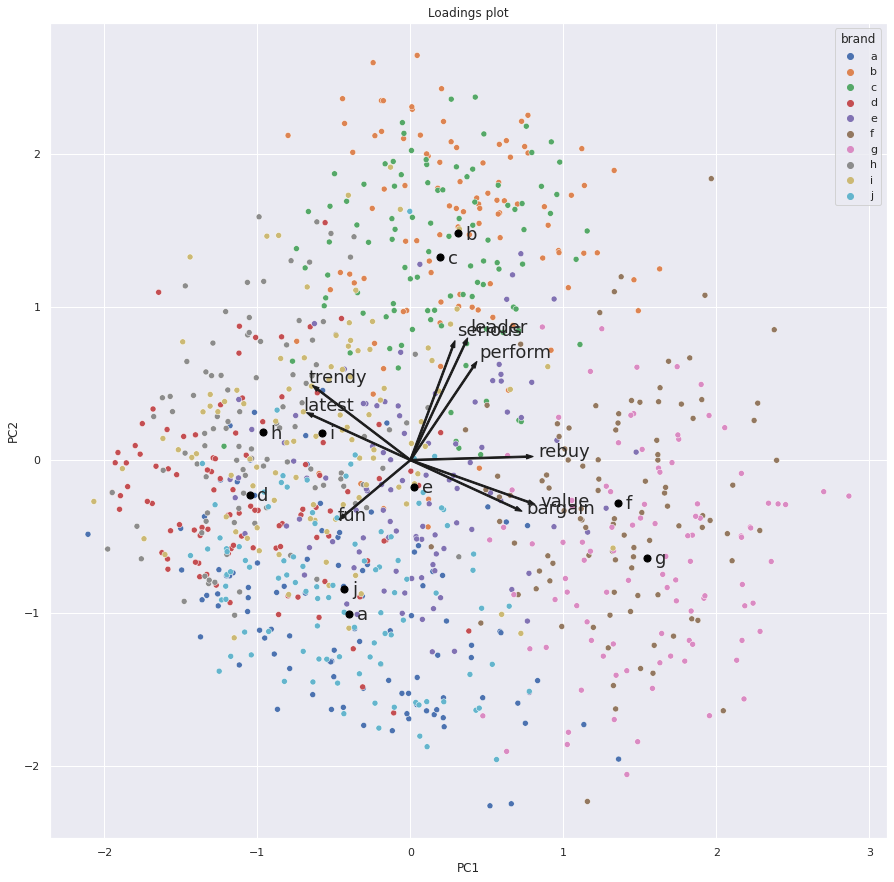

In [58]:
fig = plt.figure(figsize=[15, 15])

plt.title('Loadings plot')
plt.xlabel('PC1')
plt.ylabel('PC2')

xlim_val = np.max((1.1, np.max(np.abs(pca_corr_loadings.loc[:, 'PC1']))))
plt.xlim([-xlim_val, xlim_val])

ylim_val = np.max((1.1, np.max(np.abs(pca_corr_loadings.loc[:, 'PC2']))))
plt.ylim([-ylim_val, ylim_val])

for variable in pca_corr_loadings.index.values:
    plt.arrow(
        x=0,
        y=0,
        dx=pca_corr_loadings.loc[variable]['PC1'],
        dy=pca_corr_loadings.loc[variable]['PC2'],
        width=0.01,
        color='k'
    )

    plt.text(
        x=1.1*pca_corr_loadings.loc[variable]['PC1'],
        y=1.1*pca_corr_loadings.loc[variable]['PC2'],
        s=variable,
        fontsize=18,
    )

g = sns.scatterplot(
    x=pca_corr_scores_standardized.iloc[:, 0],
    y=pca_corr_scores_standardized.iloc[:, 1],
    hue=brand,
)

for brand_label in brand.unique():
    brand_pca_mean_scores = pca_corr_scores_standardized.loc[brand == brand_label].mean()

    plt.scatter(
        brand_pca_mean_scores.values[0],
        brand_pca_mean_scores.values[1],
        s=50,
        c='black',
        zorder=10
    )

    plt.text(
        x=brand_pca_mean_scores.values[0] + 0.05,
        y=brand_pca_mean_scores.values[1] - 0.04,
        s=brand_label,
        fontsize=18,
    )

g.axis('equal')
plt.show()

In doing so, we have created a **perceptual map** of the brands in this dataset